# Resultados

Vuelco algunos de los resultados obtenidos para el analisis de modelos de scattering en volumen utilizando autoencoders convolucionales.

Levantamos los datos en formato pkl.

In [3]:
import os
import pickle

rootdir = os.getcwd()
relative_path =os.path.join(rootdir, "../results")
files_paths = [paths for paths in os.listdir(relative_path) if paths.endswith('.pkl')]

cost = {}
for path in files_paths:
   with open(os.path.join(relative_path, path), 'rb') as f:
      cost[' '.join(path.split('.')[0].split('_')[1:])] = pickle.load(f)

In [4]:
cost.pop('SSA two layer HH', None)
cost.keys()

dict_keys(['SPM one layer', 'SPM two layer', 'SSA two layer', 'SSA two layer ngi', 'SPM two layer ngi'])

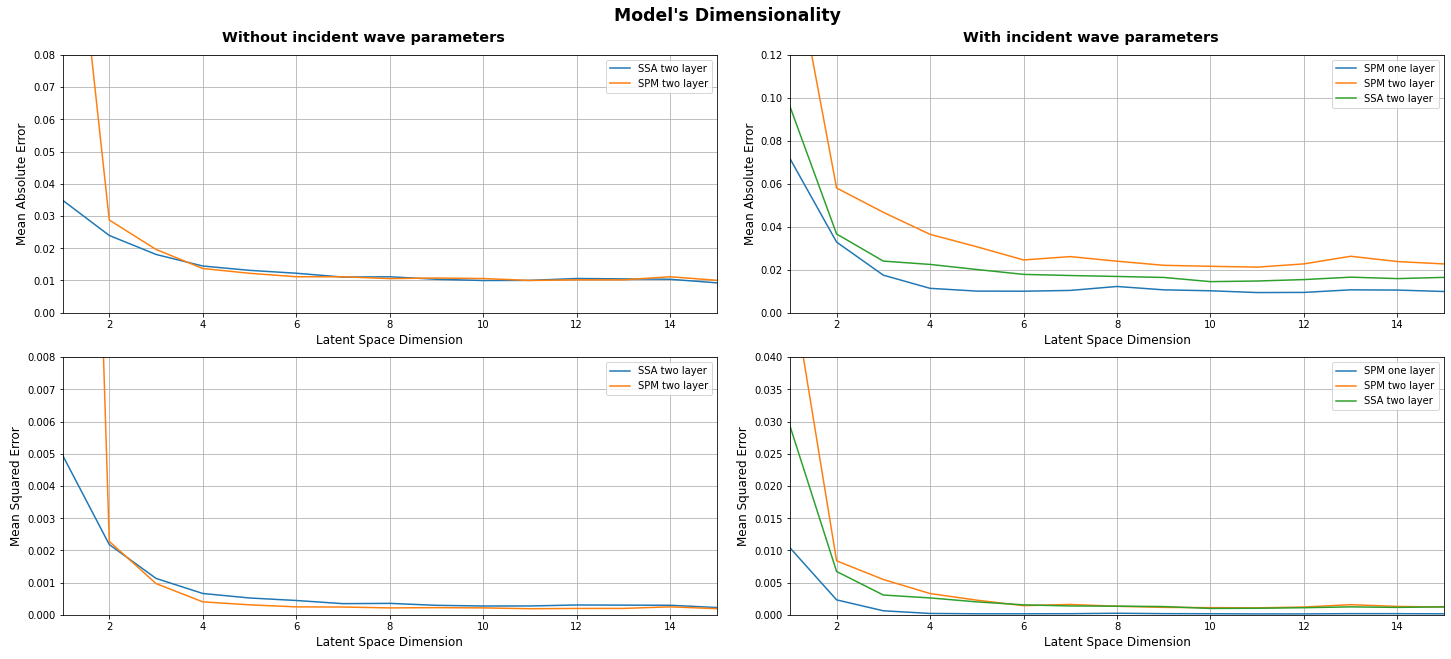

In [6]:
from matplotlib import pyplot as plt

def cost_plot(cost_function, ax, **kwargs):
    # Generate plot
    xlim = len(cost_function) + 1
    plot = ax.plot(range(1, xlim), cost_function, 
                   label = kwargs.get('label', None))

    # Axes labels
    ax.set_xlabel('Latent Space Dimension', fontsize='large') 
    ax.set_ylabel(kwargs.get('ylabel', None), fontsize='large')
    ax.set_title(kwargs.get('title', None))
    ax.set_xlim((1, xlim - 1))
    ax.set_ylim(kwargs.get('ylim', (0, 0.125)))
    ax.grid(b=True)
    ax.legend()
    #ax.labelsize      : x-large 

    return plot

# Generates figure
fig = plt.figure(constrained_layout=True, figsize=(20,9))
fig.suptitle('Model\'s Dimensionality', fontsize='xx-large', fontweight='bold')

# Divides figure in subfigures for diferent amount of parameters
sub_fig = fig.subfigures(1, 2)
left_ax = sub_fig[0].subplots(2, 1)
right_ax = sub_fig[1].subplots(2, 1)
sub_fig[0].suptitle('Without incident wave parameters', 
                    fontsize = 'x-large', fontweight='bold')
sub_fig[1].suptitle('With incident wave parameters', 
                    fontsize = 'x-large', fontweight='bold')

# Plot Cost functions for different metrics
for key in cost:
    if 'ngi' in key:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, left_ax[0], label = key[:-4], 
                  ylabel = 'Mean Absolute Error', ylim = (0, 0.08))
        cost_plot(image_mse, left_ax[1], label = key[:-4],
                  ylabel = 'Mean Squared Error', ylim = (0, 0.008))
    else:
        image_mae = cost[key]['MAE'][1]
        image_mse = cost[key]['MSE'][1]
        cost_plot(image_mae, right_ax[0], label = key, 
                  ylabel = 'Mean Absolute Error', ylim = (0, 0.12))
        cost_plot(image_mse, right_ax[1], label = key,
                  ylabel = 'Mean Squared Error', ylim = (0, 0.04)) 

plt.savefig(os.path.join(relative_path, 'cost_comparation.png')) 
plt.show()

Text(0.5, 1.0, 'SPM layers comparision')

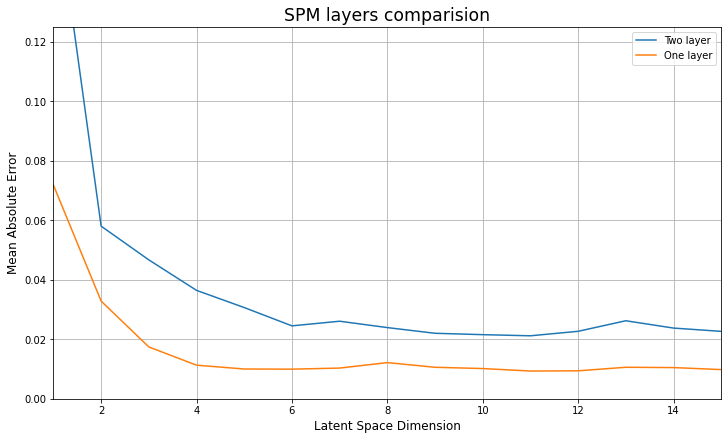

In [7]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 6))
cost_plot(cost['SPM two layer']['MAE'][1], ax,
          label='Two layer', ylabel='Mean Absolute Error')
cost_plot(cost['SPM one layer']['MAE'][1], ax,
          label='One layer', ylabel='Mean Absolute Error')  
ax.set_title('SPM layers comparision', fontsize = 'xx-large')                  